# Import Packages

In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


# Data Load

In [17]:
data = pd.read_csv("41-50.csv")

# Select the columns for independent (X) and dependent (y) variables
X = data[['cit_2017', 'cit_2018', 'cit_2019', 'cit_2020', 'cit_2021']]
y = data[['cit_2022']]

# Data Transformation and Train Test Data Split

In [18]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(scaled_features,y,test_size=0.2,random_state=42)

# Linear Regression

In [19]:
# Create a Linear Regression model and fit it to the data
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)
lin_reg_model.score(X_train,y_train) # R2 value


0.998229329526132

In [20]:
# Predict 2022 citations based on 2017-2021 citations
predicted_2022_citations = lin_reg_model.predict(X_test)

# Calculate Mean Squared Error
mse1 = mean_squared_error(y_test, predicted_2022_citations)
print(f"Mean Squared Error: {mse1}")

mae1 = mean_absolute_error(y_test, predicted_2022_citations)
print(f"Mean Absolute Error: {mae1}")

Mean Squared Error: 4043.3703836661102
Mean Absolute Error: 49.16183040652629


In [21]:
# Create a DataFrame to store the actual and predicted values
results_df = pd.DataFrame({'Actual_Citations_2022': y_test['cit_2022'], 'Predicted_Citations_2022': predicted_2022_citations.flatten()})

# Save the DataFrame to a CSV file
results_df.to_csv('pred_citations_linear.csv', index=False)

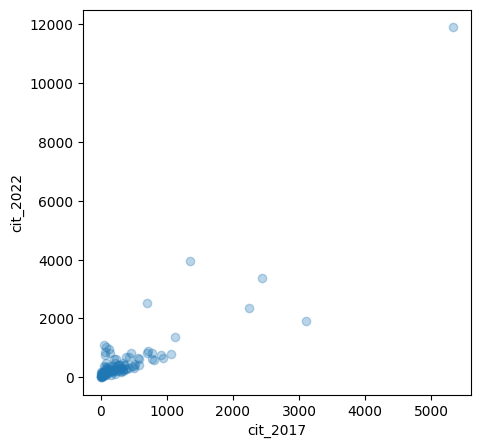

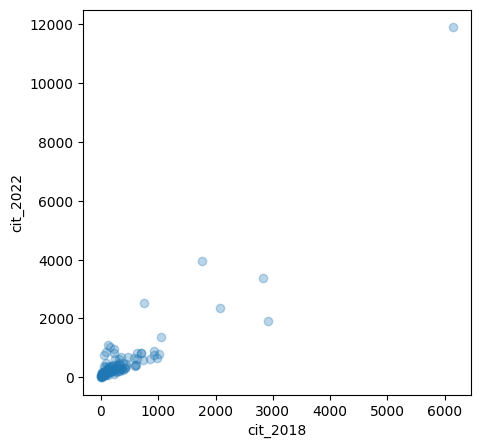

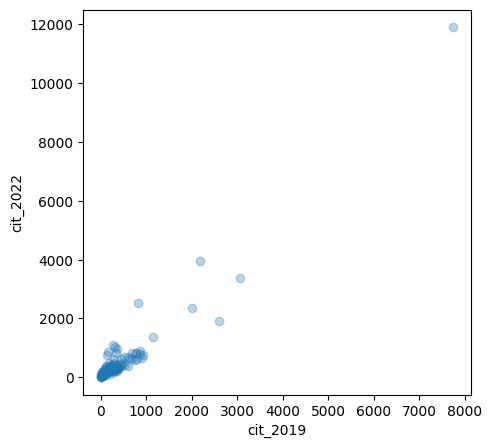

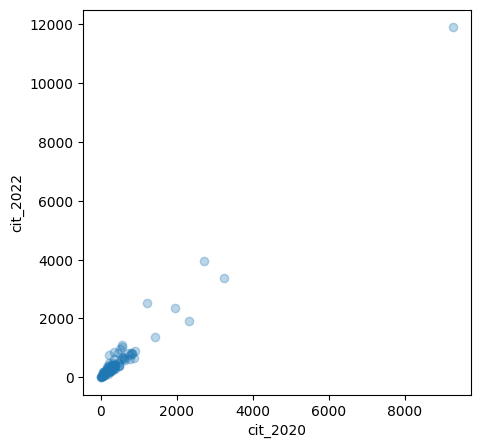

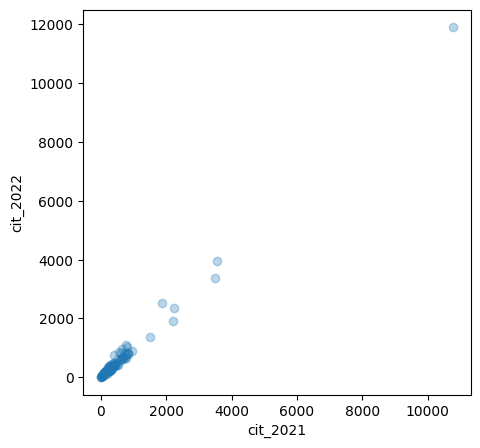

In [22]:
plt.figure(figsize = (5,5))
plt.scatter(X['cit_2017'],y, alpha = 0.3)
plt.xlabel('cit_2017')
plt.ylabel('cit_2022')

plt.show()

plt.figure(figsize = (5,5))
plt.scatter(X['cit_2018'],y, alpha = 0.3)
plt.xlabel('cit_2018')
plt.ylabel('cit_2022')

plt.show()

plt.figure(figsize = (5,5))
plt.scatter(X['cit_2019'],y, alpha = 0.3)
plt.xlabel('cit_2019')
plt.ylabel('cit_2022')

plt.show()

plt.figure(figsize = (5,5))
plt.scatter(X['cit_2020'],y, alpha = 0.3)
plt.xlabel('cit_2020')
plt.ylabel('cit_2022')

plt.show()

plt.figure(figsize = (5,5))
plt.scatter(X['cit_2021'],y, alpha = 0.3)
plt.xlabel('cit_2021')
plt.ylabel('cit_2022')

plt.show()

In [23]:
# plt.scatter(X['cit_2017'], y, label='2017', marker='o')
# plt.scatter(X['cit_2018'], y, label='2018', marker='s')
# plt.scatter(X['cit_2019'], y, label='2019', marker='^')
# plt.scatter(X['cit_2020'], y, label='2020', marker='D')
# plt.scatter(X['cit_2021'], y, label='2021', marker='p')

# plt.xlabel('Citations from 2017 to 2021')
# plt.ylabel('Citations in 2022')
# plt.title('Scatter Plot of Citations')
# plt.legend()
# plt.grid(True)
# plt.show()

# Logistic Regression

In [24]:
# Calculate the (citations in 2022) / (citations in 2021) ratio
data['citation_ratio'] = data['cit_2022'] / data['cit_2021']

# I tried using standard scaler and minmax scaler but found out that, scaling can't be applied 
# because some categories are getting dropped and the threshold levels given by professor are not matching with the data.

In [25]:

# Define categories and set the thresholds
low_threshold = 1.05
high_threshold = 1.15

# Classify individuals into three categories
category = []

# Categorize individuals based on the citation ratio
for ratio in data['citation_ratio']:
    if ratio < 1.05:
        category.append("Low")
    elif 1.05 <= ratio <= 1.15:
        category.append("Medium")
    else:
        category.append("High")

In [26]:

# Add the category column to the DataFrame
data['category'] = category

X_new = data[['cit_2017', 'cit_2018', 'cit_2019', 'cit_2020', 'cit_2021', 'citation_ratio']]
y_new = data['category']

In [27]:
# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=42,stratify = y_new)

# Create a Logistic Regression model and fit it to the training data
logistic_regression_model = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=425)
logistic_regression_model.fit(X_train, y_train)

# Evaluate the model on the test data
y_pred = logistic_regression_model.predict(X_test)


c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
# Evaluate the model on the test data
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 85.00%


In [29]:
test_data = pd.DataFrame()
test_data['y_test'] = y_test
test_data['y_pred'] = y_pred
test_data.reset_index(drop = True,inplace = True)

In [30]:
test_data.head()

,y_test,y_pred
0,High,High
1,Low,Low
2,High,High
3,High,High
4,Low,Low


In [31]:
test_data.to_csv('pred_categories_logistic_1.csv', index=False)